In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

# Ecuaciones diferenciales parciales (EDP)


Estas ecuaciones involucra una función que depende de más una variable independiente, por ejemplo:

$$ PVF =
  \begin{cases}
    \dfrac{\partial^2 y}{\partial t^2} &= c^2 \dfrac{\partial^2 y}{\partial x^2}\quad \text{Ecuación diferencial parcial}\\
y(x,0) &= f(x),\, 0 < x < L\quad \text{Condición inicial}\\
y(0,t) &= 0,\, t>0 \quad \text{Condición de frontera 1}\\
y(L,t) &= 0,\, t>0 \quad \text{Condición de frontera 2}
  \end{cases}
$$

La función que satisface el problema anterior, es una función $y(x,t)$, la cual debe describir la posición en un tiempo $t$.






## Clasificación 

Partiendo de un modelo general:

$$A(x,y)\dfrac{\partial^2 U}{\partial x^2} + B(x,y)\dfrac{\partial^2 U}{\partial x\partial y} + C(x,y)\dfrac{\partial^2 U}{\partial y^2} = F\left(x,y,\dfrac{\partial U}{\partial x}, \dfrac{\partial U}{\partial y}\right)$$

dependiendo de la valores de $A(x,y), B(x,y)$ y $C(x,y)$, la EDP puede ser 

1. Elíptica en $(a,b)$ si:
 $$B^2(a,b) - 4A(a,b) C(a,b) < 0 $$

2. Parabólica en $(a,b)$ si:
 $$B^2(a,b) - 4A(a,b) C(a,b) = 0 $$

1. Hiperbólica en $(a,b)$ si:
 $$B^2(a,b) - 4A(a,b) C(a,b) > 0 $$

## Aproximación de derivadas por diferencias finitas

Partiendo de que para expandir una función $f(x)$ diferenciable alrededor de un punto $x_i$ se puede usar serie de Taylor:

$$f(x_i + h) = f(x_i) + hf'(x_i)  + \dfrac{h^2}{2!}f''(x_i) + \dfrac{h^3}{3!}f'''(x_i) + \ldots$$

En difrencias finitas, en lugar de estimar el valor de la función, lo que se busca es aproximar la derivada de $f(x)$ en $x_i$ a partir de los valores $f(x_i)$, ya sea en:

+ diferencias hacia adelante, $x_i + h$

+ diferencias hacia atrás, $x_i - h$ 

+ diferencias centrales, un promedio de las dos anteriores.

![texto del enlace](https://upload.wikimedia.org/wikipedia/commons/3/3b/Latex.draw.tex.png)

Veamos cómo se realiza:

### Primera derivada de $f(x)$

> **Diferencias hacia adelante**
>> _Consideraciones_
>>> + $h>0$
>>> + $h\ll1$
>>>> Se pueden despreciar el lado derecho depués del segundo término en la expansión de $f(x)$ en series de Taylor, con lo cual queda:

$$f(x_i + h) = f(x_i) + hf'(x_i)  $$

>>>> Resolviendo para $f'(x_i)$

$$f'(x_i) = \dfrac{df}{dx}|{x_i}\approx \dfrac{f(x_i + h) - f(x_i)}{h} $$


> **Diferencias hacia atrás**

> Ahora se resta $h$ en la expansión de $f(x)$ por series de Taylor.

$$f(x_i - h) = f(x_i) - hf'(x_i)  + \dfrac{h^2}{2!}f''(x_i) - \dfrac{h^3}{3!}f'''(x_i) + \ldots$$

>> _Consideraciones_
>>> + $h>0$
>>> + $h\ll1$
>>>> Se pueden despreciar el lado derecho depués del segundo término en la expansión de $f(x)$ en series de Taylor, con lo cual queda:

$$f(x_i - h) = f(x_i) - hf'(x_i)  $$

>>>> Resolviendo para $f'(x_i)$

$$f'(x_i) = \dfrac{df}{dx}|_{x_i} \approx \dfrac{ f(x_i)-f(x_i - h)}{h} $$

> **Diferencias centrales**

> Sumando miembro a miembro las diferencias hacia adelante y hacia atrás, se tiene

$$\begin{align*}
2\dfrac{df}{dx}|_{x_i} &\approx \dfrac{ f(x_i)-f(x_i - h)}{h} +  \dfrac{f(x_i + h) - f(x_i)}{h}\\
\dfrac{df}{dx}|_{x_i} &\approx \dfrac{ f(x_i + h)-f(x_i - h)}{2h}\\
\end{align*}$$


### Segunda derivada de $f(x)$

En el caso de segundas derivadas $(f''(x))$, se puede hacer un ejercicio similar para obtener diferencias centrales, pero ahora considerando más términos en la expansión de $f(x_i)$.

$$f''(x)=\dfrac{d^2f}{dx^2}|_{x_i}\approx\dfrac{f(x_i + h)-2f(x_i)+f(x_i-h)}{h^2}$$

### Derivadas parciales en el caso de funciones con más de una variable independiente, por ejemplo $T(x,t)$

> **Diferencias hacia adelante** en un punto $(x_j,t_j)$

>> + $\dfrac{\partial T}{\partial x}|_{(x_i,t_j)}\approx \dfrac{T(x_i + a,t_j)-T(x_i,t_j)}{a}$ con $a>0$

>> + $\dfrac{\partial T}{\partial t}|_{(x_i,t_j)}\approx \dfrac{T(x_i,t_j + b)-T(x_i,t_j)}{b}$ con $b>0$

> **Diferencias hacia atrás** en un punto $(x_j,t_j)$

>> + $\dfrac{\partial T}{\partial x}|_{(x_i,t_j)}\approx \dfrac{T(x_i, t_j)-T(x_i-a,t_j)}{a}$ 

>> + $\dfrac{\partial T}{\partial t}|_{(x_i,t_j)}\approx \dfrac{T(x_i, t_j)-T(x_i,t_j-b)}{b}$ 

> **Diferencias centrales** en un punto $(x_j,t_j)$

>> + $\dfrac{\partial T}{\partial x}|_{(x_i,t_j)}\approx \dfrac{T(x_i+a, t_j)-T(x_i-a,t_j)}{2a}$ 

>> + $\dfrac{\partial T}{\partial t}|_{(x_i,t_j)}\approx \dfrac{T(x_i, t_j+b)-T(x_i,t_j-b)}{2b}$ 

> **Segundas derivadas parciales** en un punto $(x_j,t_j)$

>> + $\dfrac{\partial^2 T}{\partial x^2}|_{(x_i,t_j)}\approx \dfrac{T(x_i + a, t_j) - 2T(x_i,t_j) + T(x_i-a,t_j)}{a^2}$ 

>> + $\dfrac{\partial^2 T}{\partial t^2}|_{(x_i,t_j)}\approx \dfrac{T(x_i, t_j+b)-2T(x_i,t_j) + T(x_i,t_j-b)}{b^2}$

> **Segundas derivada parcial combinada** en un punto $(x_j,t_j)$

>> + $\dfrac{\partial^2 T}{\partial x\partial t}\approx \dfrac{T(x_i+a, t_j+b)-T(x_i-a,t_j+b) - T(x_i+a,t_j-b) + T(x_i-a,t_j-b)}{4ab}$


**Ejemplo**

Sea la siguiente ecuación en derivadas parciales

$$\dfrac{\partial T}{\partial t} = \alpha \dfrac{\partial^2 T}{\partial x^2}$$

la cual describe la conducción de calor en régimen transitorio (estado no estacionario) en la dirección $x$.

> **Consideraciones**

>> 1. Estado transitorio, $\dfrac{\partial T}{\partial t}$.
>> 2. La barra está aislada longitudinalmente durante cierto periodo de tiempo.
>> 3. La barra es lo suficientemente delgada y de longitud $L$ muy grande en comparación con su grosor.
>> 4. Los extremos de la barra son $x=0$ y $x = L$ 

<img src="https://drive.google.com/uc?id=17wA9btaFn7AbWDSfhyIHjgJjGsfff13m&export=download" width="50%">

> **Condición inicial y condición de frontera**

>> Condición inicial

$$T(x,0)=f(x)\quad 0<x<L$$

>>En un tiempo $t=0$, en cualquier punto $x$ de la barra la temperatura es $f(x)$.

> Condiciones de frontera, para $t>0$

$$\begin{align*}
T(0,t) &= g_1(t)\\
T(L,t) &= g_2(t)
\end{align*}$$

> Dan información de la temperatura de la barra en sus extremos a cualquier tiempo $t$.






<img src="https://drive.google.com/uc?id=1Yj3oYy27BduUbXYryeADcybWEqW_01es&export=download" width="50%">

Como la EDP

$$\dfrac{\partial T}{\partial t} = \alpha \dfrac{\partial^2 T}{\partial x^2}$$

junto con sus condiciones iniciales y de frontera, son válidas en todo el dominio, entonces también será valida en cualquier nodo $(x_i,t_j)$

$$\dfrac{\partial T}{\partial t}|_{(x_i,t_j)} = \alpha \dfrac{\partial^2 T}{\partial x^2}|_{(x_j,t_j)}$$

<img src="https://drive.google.com/uc?id=1EVjRljC7j7sQITETgaCtTe7FJLpSXYro&export=download" width="50%">


Sustituyendo en la EDP las derivadas parciales por sus aproximaciones con diferencias finitas

> + $\dfrac{\partial T}{\partial t}|_{(x_i,t_j)}\approx \dfrac{T(x_i,t_j + b)-T(x_i,t_j)}{b}$ con $b>0$

> + $\dfrac{\partial^2 T}{\partial x^2}|_{(x_i,t_j)}\approx \dfrac{T(x_i + a, t_j) - 2T(x_i,t_j) + T(x_i+a,t_j)}{a^2}$ 

Se tiene:

$$\dfrac{T_{i,j+1}-T_{i,j}}{b} = \alpha\dfrac{T_{i-1,j} - 2T_{i,j} + T_{i+1,j}}{a^2}$$

**Ejemplo**

Resolver 

$$ PVF =
  \begin{cases}
    \dfrac{\partial T}{\partial t} &= \alpha \dfrac{\partial^2 T}{\partial x^2}\quad \text{Ecuación diferencial parcial}\\
T(x,0) &= 20^{°}F,\, 0 < x < L\quad \text{Condición inicial}\\
T(0,t) &= 100^{°}F,\, t>0 \quad \text{Condición de frontera 1}\\
T(L,t) &= 100^{°}F,\, t>0 \quad \text{Condición de frontera 2}
  \end{cases}
$$
Con 
+ $L = 1\,\mathrm{pie}$
+ $\alpha = 1\, \mathrm{pie^2/h}$
+ $t_{max} = 1\, \mathrm{h}$


<img src="https://drive.google.com/uc?id=1S24wRmZAVOu-pZSGakrCIchlbFJMyS_p&export=download" width="50%">



## Método explícito
$$\dfrac{T_{i,j+1}-T_{i,j}}{b} = \alpha\dfrac{T_{i-1,j} - 2T_{i,j} + T_{i+1,j}}{a^2}$$

1. Resolvemos para el nodo $(1,1)$, evaluando la EDP en difencias finitas en el punto  $i=1$ y $j=0$

$$\dfrac{T_{1,1}-T_{1,0}}{b} = \alpha\dfrac{T_{0,0} - 2T_{1,0} + T_{2,0}}{a^2}$$

$$T_{1,1} = \alpha\dfrac{b}{a^2}(T_{0,0}-2T_{1,0}+T_{2,0}) + T_{1,0}$$

> Sustiuyendo los valores 

> + $T_{0,0} = (100 + 20)/2 = 60^°\,F$ porque es un punto singular y se acostumbra tomar la media aritmética.
> + $T_{1,0} = 20^°\,F$
> + $T_{2,0} = 20^°\,F$
> + $b = 0.01$
> + $a = 0.25$

$$T_{1,1} = 26.4$$

2. Resolvemos para el nodo $(2,1)$, evaluando la EDP en difencias finitas en el punto  $i=2$ y $j=0$

$$\dfrac{T_{2,1}-T_{2,0}}{b} = \alpha\dfrac{T_{1,0} - 2T_{2,0} + T_{3,0}}{a^2}$$

$$T_{2,1} = \alpha\dfrac{b}{a^2}(T_{1,0}-2T_{2,0}+T_{3,0}) + T_{2,0}$$

> Sustiuyendo los valores 

> + $T_{1,0} = 20$
> + $T_{2,0} = 20^°\,F$
> + $T_{3,0} = 20^°\,F$


$$T_{2,1} = 20$$



In [ ]:
# Condiciones iniciales y de frontera
CIT = 20.0
CF1T = 100.0
CF2T = 100.0
L, tmax = 1.0, 1.0

# Parámetros
alpha = 1.0

# Construcción de los arreglos para la distancia y el tiempo
x = np.linspace(0,L,5,endpoint=True)
dx = x[1]-x[0]
t = np.linspace(0,tmax,100,endpoint=True)
dt = t[1]-t[0]

F = alpha*dt/dx**2
print(dx,dt, F)

0.25 0.010101010101010102 0.16161616161616163


In [ ]:
# Construcción del arreglo T donde se almacenarán los resultados de cada iteración
Nx, Nt = len(x), len(t)
T = np.zeros((Nt,Nx))

In [ ]:
T[0:10,:]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
# Ensamble de las condiciones iniciales y de frontera en el arreglo T
T[0,0] = (CF1T+CIT)/2.0
T[0,-1] = (CF2T+CIT)/2.0
T[0,1:-1] = CIT
T[1:,0] = CF1T
T[1:,-1] = CF2T

In [ ]:
T[0:10,:]

array([[ 60.,  20.,  20.,  20.,  60.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.]])

In [ ]:
np.shape(T)

(100, 5)

In [ ]:
# El índice i es para el tiempo (fila) y j para x (columna)
for i in range(1,Nt):
  for j in range(1,Nx-1):
    T[i,j] = F*(T[i-1,j-1]-2*T[i-1,j]+T[i-1,j+1]) + T[i-1,j]
  

In [ ]:
df_ME = pd.DataFrame(T, columns =['0.0', '0.25',  '0.5', '0.75',  '1.0'])
df_ME["Tiempo"] = t
df_ME

,0.0,0.25,0.5,0.75,1.0,Tiempo
0,60.0,20.000000,20.000000,20.000000,60.0,0.000000
1,100.0,26.464646,20.000000,26.464646,100.0,0.010101
2,100.0,37.304357,22.089583,37.304357,100.0,0.020202
3,100.0,44.978033,27.007489,44.978033,100.0,0.030303
4,100.0,50.966142,32.816150,50.966142,100.0,0.040404
...,...,...,...,...,...,...
95,100.0,99.994338,99.991992,99.994338,100.0,0.959596
96,100.0,99.994874,99.992750,99.994874,100.0,0.969697
97,100.0,99.995359,99.993437,99.995359,100.0,0.979798
98,100.0,99.995798,99.994058,99.995798,100.0,0.989899


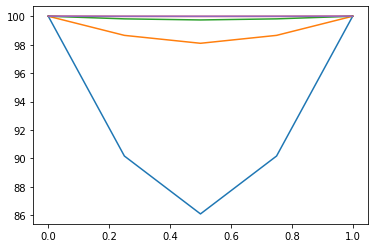

In [ ]:
plt.plot(x,T[20,:])
plt.plot(x,T[40,:])
plt.plot(x,T[60,:])
plt.plot(x,T[90,:])
plt.plot(x,T[99,:])
plt.show()

**Ejemplo**

Calcule la temperatura como una función de $x$ y $t$ en una barra aislada de longitud unitaria (en $\mathrm{pies}$), sujeta a las siguientes condiciones inicial y de frontera.

$$ PVF =
  \begin{cases}
    \dfrac{\partial T}{\partial t} &= \alpha \dfrac{\partial^2 T}{\partial x^2}\quad \text{Ecuación diferencial parcial}\\
T(x,0) &= 50\sin(\pi x),\, 0 < x < L\quad \text{Condición inicial}\\
T(0,t) &= 100^{°}F,\, t>0 \quad \text{Condición de frontera 1}\\
T(1,t) &= 50^{°}F,\, t>0 \quad \text{Condición de frontera 2}
  \end{cases}
$$
Con 
+ $L = 1\,\mathrm{pie}$
+ $\alpha = 1\, \mathrm{pie^2/h}$
+ $t_{max} = 30\, \mathrm{min}$

Partiendo de la EDP discretizada

$$\dfrac{T_{i,j+1}-T_{i,j}}{b} = \alpha\dfrac{T_{i-1,j}-2T_{i,j}+T_{i+1,j}}{a^2}$$

Resolviendo para $T_{i,j+1}$

$$T_{i,j+1} = \lambda T_{i-1,j} + (1-2\lambda)T_{i,j} + \lambda T_{i+1,j}$$

donde $\lambda = \dfrac{\alpha b}{a^2}$.

In [ ]:
# Condiciones iniciales y de frontera
CF1T = 100.0
CF2T = 50.0
L, tmax = 1.0, 0.5

# Parámetros
alpha = 1.0

# Construcción de los arreglos para la distancia y el tiempo
x = np.linspace(0,L,9,endpoint=True)
dx = x[1]-x[0]
t = np.linspace(0,tmax,100,endpoint=True)
dt = t[1]-t[0]

F = alpha*dt/dx**2
print(dx,dt, F)

0.125 0.005050505050505051 0.32323232323232326


In [ ]:
# Función para la condición inicial
def CI(x):
  return 50.0*np.sin(np.pi*x)

In [ ]:
# Construcción del arreglo T donde se almacenarán los resultados de cada iteración
Nx, Nt = len(x), len(t)
T = np.zeros((Nt,Nx))

In [ ]:
T[0:5,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# Ensamble de las condiciones de frontera en el arreglo T
T[0,0] = (100 + CI(x[0]))/2
T[0,-1] = (50 + CI(x[-1]))/2

In [ ]:
T[0:5,:]

array([[50.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 25.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [ ]:
x

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

In [ ]:
# Ensamble de las condiciones iniciales en el arreglo T
for i in range(1,Nx-1):
  T[0,i] = CI(x[i])

In [ ]:
T[0:5,:]

array([[50.        , 19.13417162, 35.35533906, 46.19397663, 50.        ,
        46.19397663, 35.35533906, 19.13417162, 25.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [ ]:
# Ensamble de las condiciones  de frontera en el arreglo T
T[1:,0] = CF1T
T[1:,-1] = CF2T
  

In [ ]:
T[0:5,:]

array([[ 50.        ,  19.13417162,  35.35533906,  46.19397663,
         50.        ,  46.19397663,  35.35533906,  19.13417162,
         25.        ],
       [100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         50.        ],
       [100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         50.        ],
       [100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         50.        ],
       [100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
         50.        ]])

In [ ]:
# El índice i es para el tiempo (fila) y j para x (columna)
for i in range(1,Nt):
  for j in range(1,Nx-1):
    T[i,j] = F*(T[i-1,j-1]-2*T[i-1,j]+T[i-1,j+1]) + T[i-1,j]
  

In [ ]:
# Convertimos el arreglo T en un dataframe para na mejor visualización

df = pd.DataFrame(T, columns =['0.0', '0.125', '0.25', '0.375', '0.5', '0.625', '0.75', '0.875', '1.0'])
df["Tiempo"] = t

In [ ]:
df.head()

,0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,Tiempo
0,50.0,19.134172,35.355339,46.193977,50.000000,46.193977,35.355339,19.134172,25.0,0.000000
1,100.0,34.354211,33.615531,43.920808,47.539540,43.920808,33.615531,26.273403,50.0,0.005051
2,100.0,55.334287,37.185295,41.759501,45.200158,41.759501,34.573317,36.315819,50.0,0.010101
3,100.0,63.905348,44.530167,41.393101,42.975895,40.548826,37.459357,40.175756,50.0,0.015152
4,100.0,69.309622,49.778851,42.918712,41.679778,40.334717,39.336001,42.473241,50.0,0.020202


In [ ]:
t[20]

0.10101010101010102

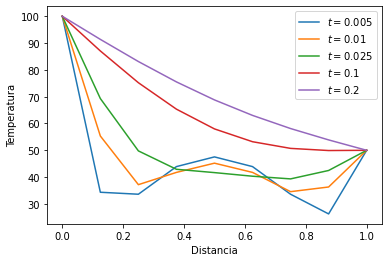

In [ ]:
plt.plot(x,T[1,:])
plt.plot(x,T[2,:])
plt.plot(x,T[4,:])
plt.plot(x,T[20,:])
plt.plot(x,T[40,:])
plt.xlabel("Distancia")
plt.ylabel("Temperatura")
plt.legend([r"$t=0.005$", r"$t=0.01$", r"$t=0.025$", r"$t=0.1$", r"$t=0.2$" ])
plt.show()

## Método implícito

Resolver:

$$ PVF =
  \begin{cases}
    \dfrac{\partial T}{\partial t} &= \alpha \dfrac{\partial^2 T}{\partial x^2}\quad \text{Ecuación diferencial parcial}\\
T(x,0) &= 20^{°}F,\, 0 < x < L\quad \text{Condición inicial}\\
T(0,t) &= 100^{°}F,\, t>0 \quad \text{Condición de frontera 1}\\
T(L,t) &= 100^{°}F,\, t>0 \quad \text{Condición de frontera 2}
  \end{cases}
$$
Con 
+ $L = 1\,\mathrm{pie}$
+ $\alpha = 1\, \mathrm{pie^2/h}$
+ $t_{max} = 1\, \mathrm{h}$


1. Se va a utilizar:

+ Diferencias hacia atras para $\dfrac{\partial T}{\partial t}$
+ Diferencias centrales para $\dfrac{\partial^2 T}{\partial x^2}$

Por lo tanto, la EDP queda:

$$\dfrac{T_{i,j}-T_{i,j-1}}{b} = \alpha\dfrac{T_{i-1,j}-2T_{i,j}+T_{i+1,j}}{a^2}$$

<img src="https://drive.google.com/uc?id=1o6VSZk4D3Ag38Cm3zf4u3Hd3Nv2zOLJc&export=download" width="50%">

2. Resolvemos para el nodo $(1,1)$

$$\dfrac{T_{1,1}-T_{1,0}}{b} = \alpha\dfrac{T_{0,1}-2T_{1,1}+T_{2,1}}{a^2}$$

>> $T(0,1)$  y $T(1,0)$ están dadas por las condiciones iniciales y de frontera.

>> $T(1,1)$ y $T(2,1)$ no se conoce su valor.

> Por lo tanto, se tiene una ecuación con dos incognitas

$$(1+2\lambda)T_{1,1} - \lambda T_{2,1} = T_{1,0} + \lambda T_{0,1}$$

3. Aplicamos el mismo razonamiento para los nodos $(2,1)$ y $(3,1)$

>> Nodo $(2,1)$

$$\dfrac{T_{2,1}-T_{2,0}}{b} = \alpha\dfrac{T_{1,1}-2T_{2,1}+T_{3,1}}{a^2}$$

>> En este nodo se tienen tres incógnitas $T_{1,1}$, $T_{2,1}$, $T_{3,1}$

$$-\lambda T_{1,1} + (1 + 2\lambda) T_{2,1} - \lambda T_{3,1} = T_{2,0} $$

>> Nodo $(3,1)$

$$\dfrac{T_{3,1}-T_{3,0}}{b} = \alpha\dfrac{T_{2,1}-2T_{3,1}+T_{4,1}}{a^2}$$

>> En este nodo se tienen dos incógnitas $T_{2,1}$ y $T_{3,1}$

$$-\lambda T_{2,1} + (1 + 2\lambda) T_{3,1} = T_{3,0} + \lambda T_{4,1}$$


Considerando los nodos $(1,1)$, $(2,1)$  y $(3,1)$ se llega al siguiente sistema de ecuaciones lineales:

\begin{array}{rclclcl}
(1+2\lambda)T_{1,1} & - & \lambda T_{2,1}     &   &               &  = & \lambda T_{0,1} + T_{1,0} \\
-\lambda T_{1,1}    & + & (1+2\lambda)T_{2,1} & - & \lambda T_{3,1}& = & T_{2,0} \\
                    & - & \lambda T_{2,1}     & + & (1+2\lambda)T_{3,1}& = & T_{3,0} + \lambda T_{4,1}
\end{array}

Sustituyendo los valores conocidos

+ $\lambda = 0.16$
+ $T_{1,0} = T_{2,0} = T_{3,0} = 20$
+ $T_{0,1} = T_{4,1} = 100$

se tiene que:

\begin{align*}
T_{1,1} &= 29.99\\
T_{2,1} &= 22.42\\
T_{3,1} &= 29.99\\
\end{align*}


Aplicando el mismo razonamiento para los nodos $(1,2)$, $(2,2)$ y $(3,2)$ se tiene:

\begin{array}{rclclcl}
(1+2\lambda)T_{1,2} & - & \lambda T_{2,2}     &   &               &  = & \lambda T_{0,2} + T_{1,1} \\
-\lambda T_{1,2}    & + & (1+2\lambda)T_{2,2} & - & \lambda T_{3,2}& = & T_{2,1} \\
                    & - & \lambda T_{2,2}     & + & (1+2\lambda)T_{3,2}& = & T_{3,1} + \lambda T_{4,2}
\end{array}

Sustituyendo los valores optenidos en la iteracción anterior

+ $\lambda = 0.16$
+ $T_{0,2} = T_{4,2}  = 100$
+ $T_{1,1} = T_{3,1} = 29.99$
+ $T_{2,1} = 22.42$

se tiene que:

\begin{align*}
T_{1,2} &= 38.02\\
T_{2,2} &= 26.2\\
T_{3,2} &= 38.02\\
\end{align*}

In [ ]:
# Condiciones iniciales y de frontera
CIT = 20.0
CF1T = 100.0
CF2T = 100.0
L, tmax = 1.0, 1.0

# Parámetros
alpha = 1.0

# Construcción de los arreglos para la distancia y el tiempo
x = np.linspace(0,L,5,endpoint=True)
dx = x[1]-x[0]
t = np.around(np.linspace(0,tmax,100,endpoint=True),2)
dt = t[1]-t[0]

F = alpha*dt/dx**2
print(dx,dt, F)

0.25 0.01 0.16


In [ ]:
# Funciones para contruir el sistema de ecuaciones lineales

def MASEL(l):
  F1 = [(1+2*l), -l, 0]
  F2 = [-l, (1+2*l), -l]
  F3 = [0, -l, (1+2*l)]
  return np.array([F1,F2,F3])

def VbSEL(l,T0,T1,T2,T3,T4):
  return np.array([l*T0 + T1, T2, l*T4 + T3])

In [ ]:
Nx, Nt = len(x), len(t)
T = np.zeros((Nt,Nx))

In [ ]:
T[0:5,:]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
T[0,0] = (CF1T+CIT)/2.0
T[0,-1] = (CF2T+CIT)/2.0
T[0,1:-1] = CIT
T[1:,0] = CF1T
T[1:,-1] = CF2T

In [ ]:
T[0:5,:]

array([[ 60.,  20.,  20.,  20.,  60.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.]])

In [ ]:
A = MASEL(F)
A

array([[ 1.32, -0.16,  0.  ],
       [-0.16,  1.32, -0.16],
       [ 0.  , -0.16,  1.32]])

In [ ]:
for j in range(Nt-1):
  b = VbSEL(F, T[j+1,0], T[j,1], T[j,2], T[j,3], T[j+1,4])
  T[j+1,1], T[j+1,2], T[j+1,3] = np.linalg.solve(A,b)

In [ ]:
df = pd.DataFrame(T, columns =['0.0', '0.25',  '0.5', '0.75',  '1.0'])
df["Tiempo"] = t
df

,0.0,0.25,0.5,0.75,1.0,Tiempo
0,60.0,20.000000,20.000000,20.000000,60.0,0.00
1,100.0,29.990539,22.421949,29.990539,100.0,0.01
2,100.0,38.017398,26.202664,38.017398,100.0,0.02
3,100.0,44.640132,30.672353,44.640132,100.0,0.03
4,100.0,50.232114,35.414113,50.232114,100.0,0.04
...,...,...,...,...,...,...
95,100.0,99.986259,99.980567,99.986259,100.0,0.96
96,100.0,99.987437,99.982233,99.987437,100.0,0.97
97,100.0,99.988513,99.983755,99.988513,100.0,0.98
98,100.0,99.989498,99.985147,99.989498,100.0,0.99


In [ ]:
t01 = df["Tiempo"] == 0.01
t01.head()


0    False
1     True
2    False
3    False
4    False
Name: Tiempo, dtype: bool

In [ ]:
t05 = df["Tiempo"] == 0.05
t05

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Tiempo, Length: 100, dtype: bool

In [ ]:
df_t05 = df[t05]
df_t05

,0.0,0.25,0.5,0.75,1.0,Tiempo
5,100.0,55.045322,40.173194,55.045322,100.0,0.05


In [ ]:
t01 = df["Tiempo"] == 0.01
df_t01 = df[t01]
t1 = df["Tiempo"] == 0.1
df_t1 = df[t1]
t2 = df["Tiempo"] == 0.2
df_t2 = df[t2]
t4 = df["Tiempo"] == 0.4
df_t4 = df[t4]


In [ ]:
df_datos = df_t01.append(df_t05)
df_datos = df_datos.append(df_t1)
df_datos = df_datos.append(df_t2)
df_datos = df_datos.append(df_t4)
df_datos

,0.0,0.25,0.5,0.75,1.0,Tiempo
1,100.0,29.990539,22.421949,29.990539,100.0,0.01
5,100.0,55.045322,40.173194,55.045322,100.0,0.05
10,100.0,71.973709,60.788921,71.973709,100.0,0.10
20,100.0,88.617844,83.908628,88.617844,100.0,0.20
40,100.0,98.103373,97.317765,98.103373,100.0,0.40


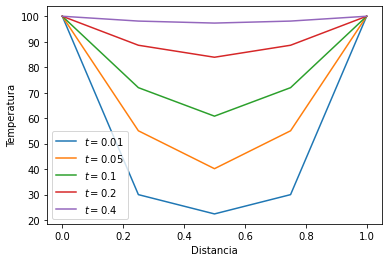

In [ ]:
plt.plot(x,T[1,:])
plt.plot(x,T[5,:])
plt.plot(x,T[10,:])
plt.plot(x,T[20,:])
plt.plot(x,T[40,:])
plt.xlabel("Distancia")
plt.ylabel("Temperatura")
plt.legend([r"$t=0.01$", r"$t=0.05$", r"$t=0.1$", r"$t=0.2$", r"$t=0.4$" ])
plt.show()

En general, si se divide la longitud de la barra en $n$ subintervalos, con lo cual se obtienen $n-1$ nodos o puntos interiores, y por lo tanto se tiene que resolver un sistema de $n-1$ ecuaciones lineales.

\begin{array}{rcrcrcrcl}
(1+2\lambda)T_{1,j+1} & - &\lambda T_{2,j+1} &  & & & &  = &\lambda T_{0,j+1} +T_{1,j}\\
-\lambda T_{1,j+1} & + & (1+2\lambda)T_{2,j+1}& - &\lambda T_{3,j+1}& & & = &T_{2,j}  \\
                   &- & \lambda T_{2,j+1}     & + &(1+2\lambda)T_{3,j+1}& -& \lambda T_{4,j+1} & = & T_{3,j}\\
& &    &  &\vdots& &  & & \\
                  &- & \lambda T_{n-3,j+1}     & + &(1+2\lambda)T_{n-2,j+1}& -& \lambda T_{n-1,j+1} & = & T_{n-2,j}\\
                  &  &                        & -&\lambda T_{n-2,j+1}& + & (1+2\lambda) T_{n-1,j+1} & = & T_{n-1,j}+\lambda T_{n,j+1}
\end{array}

La matriz de este sistema es simétrica, tridiagonal y de coeficientes constantes.



## Método de Crank-Nicholson

Consiste en obtener un algoritmo implícito de la forma siguiente:

1. Aproximar $\partial T/\partial t$ en el nodo $(i,j)$ con diferencias hacia adelante, y $\partial^2 T/\partial t^2$ con diferencias centrales.

$$\dfrac{T_{i,j+1}-T_{i,j}}{\Delta t} = \alpha \dfrac{T_{i-1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2}$$

2. Aproximar $\partial T/\partial t$ en el nodo $(i,j+1)$ con diferencias hacia atrás, y $\partial^2 T/\partial t^2$ con diferencias centrales.

$$\dfrac{T_{i,j+1}-T_{i,j}}{\Delta t} = \alpha \dfrac{T_{i-1,j+1}-2T_{i,j+1}+T_{i+1,j+1}}{\Delta x^2}$$

3. Al sumar las aproximaciones se llega al algoritmo de Crack-Nicholson:

$$T_{i,j+1} - T_{i,j} = \dfrac{\lambda}{2}\left[T_{i-1,j} - 2T_{i,j} + T_{i+1,j} + T_{i-1,j+1} - 2T_{i,j+1} + T_{i+1,j+1} \right]$$



Al aplicar el algoritmo en $i=1$ y $j=0$ para conocer el valor del nodo $(1,1)$, se tiene

$$T_{1,1} - T_{1,0} = \dfrac{\lambda}{2}\left[T_{0,0} - 2T_{1,0} + T_{2,0} + T_{0,1} - 2T_{1,1} + T_{2,1} \right]$$


<figure>
  <img src="https://drive.google.com/uc?id=1Vru8OtDge6JdUVt41OhBXlU-7sQN-tIX&export=download" width="50%">
  <figcaption> Discretización para el método de Crank-Nicholson.</figcaption>
</figure>




Al analizar la figura, se sabe que los nodos $(0,0)$, $(1,0)$, $(2,0)$ y $(0,1)$ son puntos con valores conocidos a partir de las condiciones inicial y de frontera. Entonces, pasamos del lado derecho los nodos (valores) conocidos y del lado izquierdo los que se desconocen.

$$(1+\lambda)T_{1,1} - \dfrac{\lambda}{2}T_{2,1} = (1-\lambda)T_{1,0} + \dfrac{\lambda}{2}\left[T_{0,0} + T_{0,1} + T_{2,0} \right]$$

Se aplica un razonamiento similar para encontrar el valor en el nodo $(2,1)$ y $(3,1)$, se evalúa el algoritmo en $i = 2, j=0$ y $i = 3, j=0$, espectivamente:

$$-\dfrac{\lambda}{2}T_{1,1} + (1+\lambda)T_{2,1}-\dfrac{\lambda}{2}T_{3,1} = \dfrac{\lambda}{2}T_{1,0} + (1-\lambda)T_{2,0}+\dfrac{\lambda}{2}T_{3,0}$$

$$-\dfrac{\lambda}{2}T_{2,1} + (1+\lambda)T_{3,1} = \dfrac{\lambda}{2}[T_{2,0} +T_{4,0} + T_{4,1}] + (1-\lambda)T_{3,0}$$

Con lo cual se llega a un sistema de ecuaciones lineales 

\begin{array}{rcrcl}
(1+\lambda)T_{1,1} & - & \dfrac{\lambda}{2}T_{2,1}& & & = & (1-\lambda)T_{1,0} + \dfrac{\lambda}{2}\left[T_{0,0} + T_{0,1} + T_{2,0} \right]\\
-\dfrac{\lambda}{2}T_{1,1} & + & (1+\lambda)T_{2,1} &- & \dfrac{\lambda}{2}T_{3,1} & = & \dfrac{\lambda}{2}[T_{1,0} +T_{3,0}]+ (1-\lambda)T_{2,0}\\
& - &\dfrac{\lambda}{2}T_{2,1} & + & (1+\lambda)T_{3,1}  & = & \dfrac{\lambda}{2}[T_{2,0} +T_{4,0} + T_{4,1}] + (1-\lambda)T_{3,0}
\end{array}


el cual, al resolver, permite conocer los valores en los nodos interiores $(1,1),\, (1,2)$ y $(1,3)$.

Se sigue un razonamiento similar para resolver los nodos $(2,1),\,(2,2)$ y $(2,3)$

\begin{array}{rcrcl}
(1+\lambda)T_{1,2} & - & \dfrac{\lambda}{2}T_{2,2}& & & = & (1-\lambda)T_{1,1} + \dfrac{\lambda}{2}\left[T_{0,1} + T_{0,2} + T_{2,1} \right]\\
-\dfrac{\lambda}{2}T_{1,2} & + & (1+\lambda)T_{2,2} &- & \dfrac{\lambda}{2}T_{3,2} & = & \dfrac{\lambda}{2}[T_{1,1} + T_{3,1}] + (1-\lambda)T_{2,1}\\
& - &\dfrac{\lambda}{2}T_{2,2} & + & (1+\lambda)T_{3,2}  & = & \dfrac{\lambda}{2}[T_{2,1} +T_{4,1} + T_{4,2}] + (1-\lambda)T_{3,1}
\end{array}



**Ejemplo**

Resolver utilizando el algoritmo de Crank-Nicholson

$$ PVF =
  \begin{cases}
    \dfrac{\partial T}{\partial t} &= \alpha \dfrac{\partial^2 T}{\partial x^2}\quad \text{Ecuación diferencial parcial}\\
T(x,0) &= 20^{°}F,\, 0 < x < L\quad \text{Condición inicial}\\
T(0,t) &= 100^{°}F,\, t>0 \quad \text{Condición de frontera 1}\\
T(L,t) &= 100^{°}F,\, t>0 \quad \text{Condición de frontera 2}
  \end{cases}
$$
Con 
+ $L = 1\,\mathrm{pie}$
+ $\alpha = 1\, \mathrm{pie^2/h}$
+ $t_{max} = 1\, \mathrm{h}$


In [ ]:
# Condiciones iniciales y de frontera
CIT = 20.0
CF1T = 100.0
CF2T = 100.0
L, tmax = 1.0, 1.0

# Parámetros
alpha = 1.0

# Construcción de los arreglos para la distancia y el tiempo
x = np.linspace(0,L,5,endpoint=True)
dx = x[1]-x[0]
t = np.around(np.linspace(0,tmax,100,endpoint=True),2)
dt = t[1]-t[0]

F = alpha*dt/dx**2
print(dx,dt, F)

0.25 0.01 0.16


In [ ]:
# Funciones para contruir el sistema de ecuaciones lineales

def MASEL(l):
  F1 = [(1+l), -l/2, 0]
  F2 = [-l/2, (1+l), 0]
  F3 = [0, -l/2, (1+l)]
  return csc_matrix([F1,F2,F3])

def VbSEL(l,T00,T01,T10,T20,T30,T40,T41):
  E1 = (1-l)*T10 + 0.5*l*(T00 + T01 + T20)
  E2 = 0.5*l*(T10 + T30) + (1-l)*T20
  E3 = 0.5*l*(T20 + T40 + T41) + (1-l)*T30
  return np.array([E1,E2,E3])

In [ ]:
# Construimos un arreglo T para almacenar los valores calculados.
Nx, Nt = len(x), len(t)
T = np.zeros((Nt,Nx))

In [ ]:
T[0:5,:]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
T[0,0] = (CF1T+CIT)/2.0
T[0,-1] = (CF2T+CIT)/2.0
T[0,1:-1] = CIT
T[1:,0] = CF1T
T[1:,-1] = CF2T

In [ ]:
T[0:5,:]

array([[ 60.,  20.,  20.,  20.,  60.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.],
       [100.,   0.,   0.,   0., 100.]])

In [ ]:
A = MASEL(F)
A

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Column format>

In [ ]:
# def VbSEL(l,T00,T01,T10,T20,T30,T40,T41):
for j in range(Nt-1):
  b = VbSEL(F, T[j,0], T[j+1,0], T[j,1], T[j,2], T[j,3], T[j,4], T[j+1,4])
  T[j+1,1], T[j+1,2], T[j+1,3] = spsolve(A,b)


In [ ]:
b

array([87.99971613, 63.19963746, 87.99971613])

In [ ]:
df_Crank_Nicholson = pd.DataFrame(T, columns =['0.0', '0.25',  '0.5', '0.75',  '1.0'])
df_Crank_Nicholson["Tiempo"] = t
df_Crank_Nicholson

,0.0,0.25,0.5,0.75,1.0,Tiempo
0,60.0,20.000000,20.000000,20.000000,60.0,0.00
1,100.0,28.219833,19.187575,28.219833,100.0,0.01
2,100.0,36.953876,20.335385,36.953876,100.0,0.02
3,100.0,43.529367,22.824735,43.529367,100.0,0.03
4,100.0,48.673946,25.889131,48.673946,100.0,0.04
...,...,...,...,...,...,...
95,100.0,79.999564,59.999460,79.999564,100.0,0.96
96,100.0,79.999614,59.999522,79.999614,100.0,0.97
97,100.0,79.999658,59.999577,79.999658,100.0,0.98
98,100.0,79.999698,59.999626,79.999698,100.0,0.99


## Tipos de condiciones de frontera

1. **Dirichlet**

Cuando la variable dependiente es conocida en todos los puntos de frontera.

2. **Condiciones de Neuman**

Se conoce la derivada de la variable dependiente en los puntos de frontera. Por ejemplo, en el siguiente PVF para la conducción de calor

$$ PVF =
  \begin{cases}
    \dfrac{\partial T}{\partial t} &= \alpha \dfrac{\partial^2 T}{\partial x^2}\quad \text{Ecuación diferencial parcial}\\
T(x,0) &= f(x),\, 0 < x < L\quad \text{Condición inicial}\\
\dfrac{dT}{dx}|_{x=0} &= g_1(t),\, t>0 \quad \text{Condición de frontera 1}\\
\dfrac{dT}{dx}|_{x=L} &= g_2(t),\, t>0 \quad \text{Condición de frontera 2}
  \end{cases}
$$

se conoce como cambia la temperatura (gradiente) en $x=0$ y $x=L$.

> + Si la frontera está aislada térmicamente, no hay cambio de temperatura en la frontera.

$$\dfrac{dT}{dx}|_{x=L} = 0$$

> + Si la frontera está en contacto con el aire (o algún otro material), se puede usar la ley de enfriamiento de Newton para modelar la transferencia 

$$\dfrac{dT}{dx}|_{x=L} = h(T-To)$$

> donde $h$ es el coeficiente de transmisión de calor y $T_0$ es la temperatura del material.

3. **Condiciones combinadas**

> En la formulación de algunos problemas se puede tener una combinación de Dirichlet y Neumann, por ejemplo:
$$ PVF =
  \begin{cases}
    \dfrac{\partial T}{\partial t} &= \alpha \dfrac{\partial^2 T}{\partial x^2}\quad \text{Ecuación diferencial parcial}\\
T(x,0) &= f(x),\, 0 < x < L\quad \text{Condición inicial}\\
\dfrac{dT}{dx}|_{x=0} &= g_1(t),\, t>0 \quad \text{Condición de frontera 1, tipo Neumann}\\
T(x,L) &= g_2(t),\, t>0 \quad \text{Condición de frontera 2, tipo Dirichlet}
  \end{cases}
$$
